In [1]:
import pandas as pd
sales_data = pd.read_csv("Advertising.csv")
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
# removing un necessary column
sales_data.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
sales_data.shape

(200, 4)

In [5]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
sales_data.duplicated().sum()

0

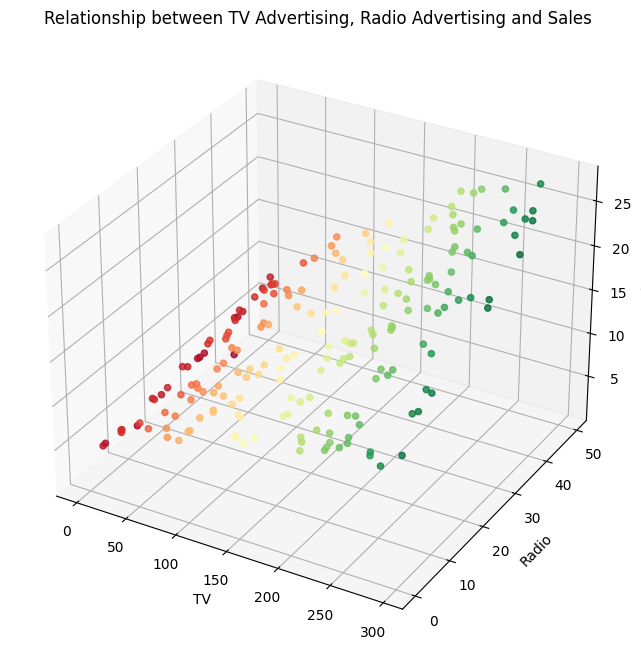

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colors = ['red' if source == 'TV' else 'green' for source in ['TV', 'Radio']]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sales_data['TV'], sales_data['Radio'], sales_data['Sales'], c=sales_data['TV'], cmap=plt.cm.RdYlGn, marker='o', alpha=0.8)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.title('Relationship between TV Advertising, Radio Advertising and Sales')
plt.show()



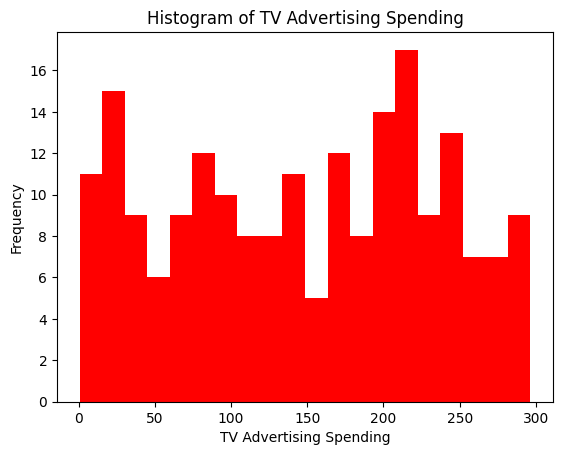

In [10]:
# Using histogram because we have continuous data
plt.hist(sales_data['TV'], bins=20, color='red')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV Advertising Spending')
plt.show()



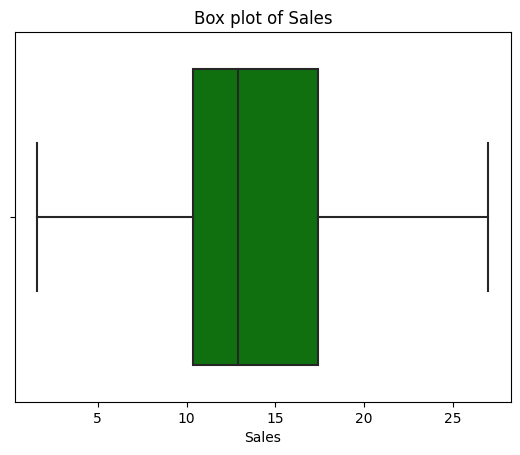

In [11]:
# Box plot to Vizualize Sales
sns.boxplot(x=sales_data['Sales'], color='green')
plt.xlabel('Sales')
plt.title('Box plot of Sales')
plt.show()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


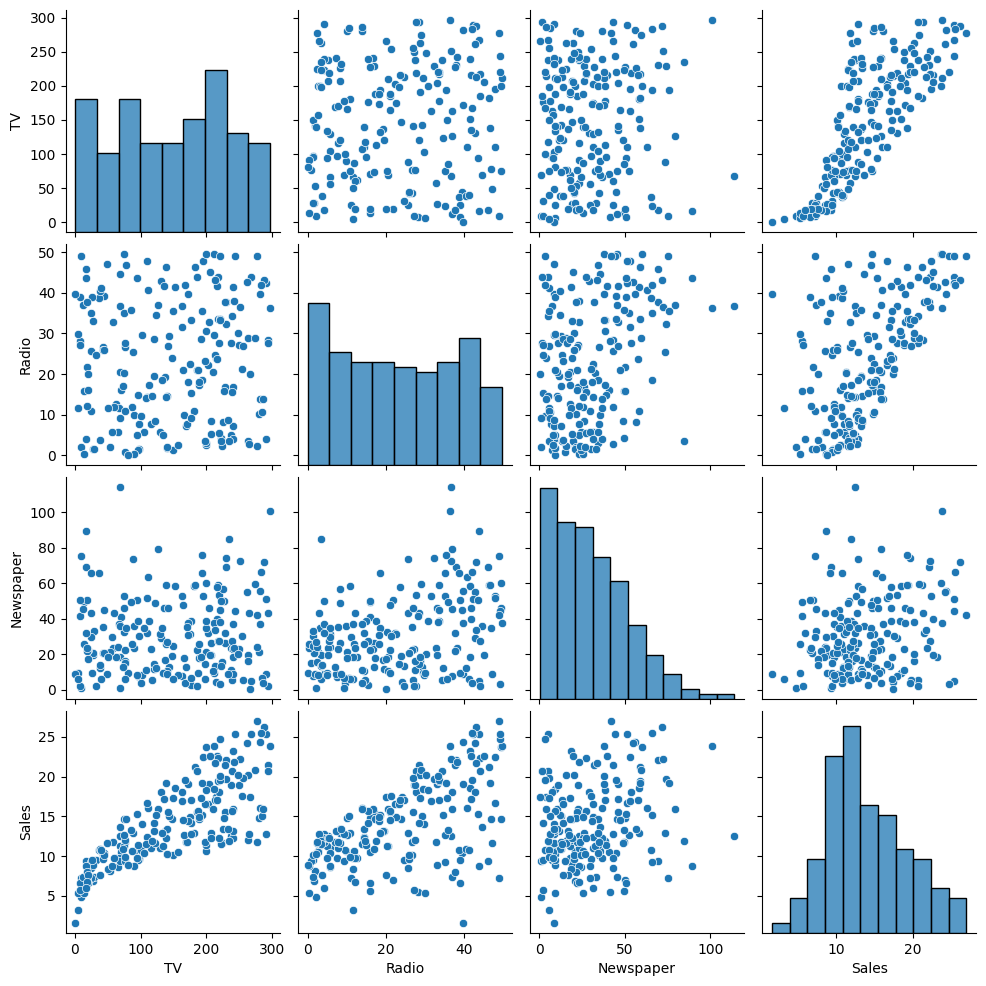

In [12]:
sns.pairplot(sales_data)
plt.show()

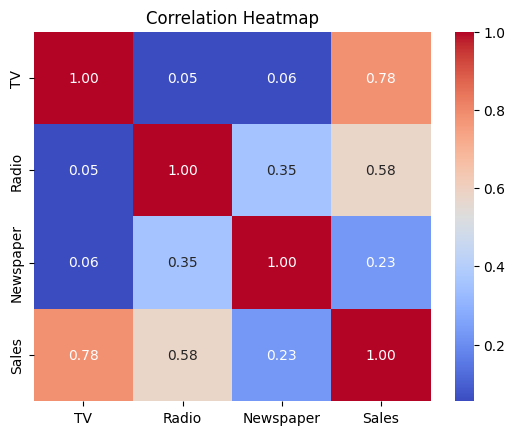

In [13]:
correlation_matrix = sales_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#feature engineering
#creating a feature Total_ads_spend 
sales_data['Total_ads_spend'] = sales_data['TV'] + sales_data['Radio'] + sales_data['Newspaper']

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TV               200 non-null    float64
 1   Radio            200 non-null    float64
 2   Newspaper        200 non-null    float64
 3   Sales            200 non-null    float64
 4   Total_ads_spend  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [16]:
sales_data.head()

,TV,Radio,Newspaper,Sales,Total_ads_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [17]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = sales_data.drop('Sales', axis=1)
y = sales_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [19]:
# Making predictions on the test set
y_pred = model_linear.predict(X_test)

In [20]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976106
R-squared: 0.8994380241009119


In [29]:
import tkinter as tk
from tkinter import ttk

def predict_sales():
    tv = float(tv_entry.get())
    radio = float(radio_entry.get())
    newspaper = float(newspaper_entry.get())
    total_ads_spend = tv + radio + newspaper

    # Making a prediction using the linear regression model
    predicted_sales = model_linear.predict([[tv, radio, newspaper, total_ads_spend]])

    result_label.config(text=f"Predicted Sales: {predicted_sales[0]:.2f}")

def calculate_total_ads_spend():
    tv_value = float(tv_entry.get())
    radio_value = float(radio_entry.get())
    newspaper_value = float(newspaper_entry.get())
    total_ads_spend = tv_value + radio_value + newspaper_value

    total_ads_spend_label.config(text=f"Total Ads Spend: {total_ads_spend:.2f}")

root = tk.Tk()
root.title("Sales Prediction GUI")

tv_label = ttk.Label(root, text="TV Advertising Spending:")
tv_label.grid(row=0, column=0, padx=10, pady=10)
tv_entry = ttk.Entry(root)
tv_entry.grid(row=0, column=1, padx=10, pady=10)

radio_label = ttk.Label(root, text="Radio Advertising Spending:")
radio_label.grid(row=1, column=0, padx=10, pady=10)
radio_entry = ttk.Entry(root)
radio_entry.grid(row=1, column=1, padx=10, pady=10)

newspaper_label = ttk.Label(root, text="Newspaper Advertising Spending:")
newspaper_label.grid(row=2, column=0, padx=10, pady=10)
newspaper_entry = ttk.Entry(root)
newspaper_entry.grid(row=2, column=1, padx=10, pady=10)

total_ads_spend_label = ttk.Label(root, text="Total Advertising Spending:")
total_ads_spend_label.grid(row=3, column=0, padx=10, pady=10)

# Button to calculate and display total_ads_spend
total_ads_spend_button = ttk.Button(root, text="Calculate Ads Spend", command=calculate_total_ads_spend)
total_ads_spend_button.grid(row=4, column=0, columnspan=2, pady=10)

# Button to predict sales
predict_button = ttk.Button(root, text="Predict Sales", command=predict_sales)
predict_button.grid(row=5, column=0, columnspan=2, pady=10)

result_label = ttk.Label(root, text="")
result_label.grid(row=6, column=0, columnspan=2)

root.mainloop()


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
import joblib
model_filename = 'sales_prediction.joblib'
joblib.dump(model_linear, model_filename)
print(f"Model saved as {model_filename}")

Model saved as sales_prediction.joblib
